In [2]:
%matplotlib inline
import loompy
import logging
import pandas as pd
import numpy as np
import cytograph as cg
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import *
from sklearn.metrics.pairwise import cosine_distances
import numpy_groupies as npg
import matplotlib.pyplot as plt

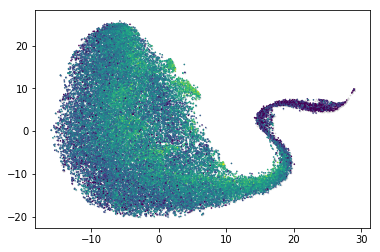

In [11]:
with loompy.connect("/Users/stelin/L1_OligoPons.loom") as ds:
    gene = "Mog"
    plt.scatter(ds.ca._X,ds.ca._Y,s=10,lw=0,marker='.',c="lightgrey")
    cells = ds[ds.ra.Gene == gene, :][0] > 0
    plt.scatter(ds.ca._X[cells],ds.ca._Y[cells],s=10,lw=0,marker='.',c=np.log(ds[ds.ra.Gene == gene, :][0][cells]))


In [387]:
celltypes = ["OPC", "COP1", "COP2", "NFOL1", "NFOL2", "MFOL1", "MFOL2", "MOL1", "MOL2", "MOL3"]
with loompy.connect("/Users/sten/build_20171205/L5_All.agg.loom") as ds:
    genes = []
    for ct in celltypes:
        ix = np.where(ds.ca.ClusterName == ct)[0]
        enrichment = ds["enrichment"][:, ix][:,0]
        genes += list(np.argsort(-enrichment)[:200])
    genes = np.sort(ds.ra.Gene[np.unique(genes)])


In [549]:
with loompy.connect("/Users/sten/L1_OligoPons.loom") as ds:
    gene_ids = np.where(np.isin(ds.ra.Gene, genes))[0]
    data = ds[gene_ids, :]

In [558]:
N = 36609
x = []
ix = 31140
for _ in range(10):
    x.append(cosine_distances(np.vstack([np.random.poisson(data[:,ix]),np.random.poisson(data[:,ix])]))[0,1])
print(np.mean(x))
#rg = radius_neighbors_graph(data[:, :N].T+1, metric="cosine",radius=r,mode="distance")
d = cosine_distances(data[:, :N].T, (data[:, :N].T)[ix][None, :])[:,0]
print(d)

0.00151951390735
[ 0.22261322  0.15500194  0.07825124 ...,  0.00512195  0.00249487
  0.01751918]


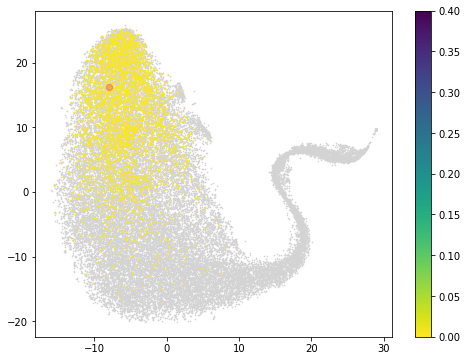

In [561]:
with loompy.connect("/Users/sten/L1_OligoPons.loom") as ds:
    #print(np.where(ds[ds.ra.Gene=="Pdgfra", :]>0))
    plt.figure(figsize=(8,6))
    ax = plt.axes()
    plt.scatter(ds.ca._X,ds.ca._Y,s=10,lw=0,marker='.',c="lightgrey")
    cells = d < 0.003
    cax=plt.scatter(ds.ca._X[:N][cells],ds.ca._Y[:N][cells],s=10,vmin=0,vmax=0.4,cmap="viridis_r",lw=0,marker='.',c=d[cells])
    plt.scatter(ds.ca._X[ix],ds.ca._Y[ix],s=40,c="red",alpha=0.25)
    plt.colorbar(cax)

In [394]:
data.shape

(933, 36609)

In [396]:
from sklearn.manifold import TSNE
tsne = TSNE(metric="cosine")
xy = tsne.fit_transform(data.T)

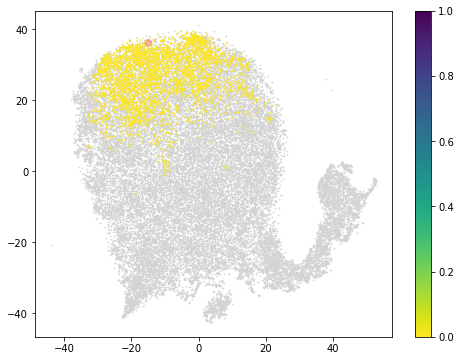

In [562]:
with loompy.connect("/Users/sten/L1_OligoPons.loom") as ds:
    opcs = np.where(ds[ds.ra.Gene=="Pdgfra", :]>0)[1]
    #print(opcs)
    plt.figure(figsize=(8,6))
    ax = plt.axes()
    plt.scatter(xy[:,0],xy[:,1],s=10,lw=0,marker='.',c="lightgrey")
    # d = ds[ds.ra.Gene == "Itpr2", :][0]
    # d = ds.ca._Total
    d < 0.2248
    cax=plt.scatter(xy[:,0][cells],xy[:,1][cells],s=10,vmin=0,vmax=1,cmap="viridis_r",lw=0,marker='.',c=d[cells])
    plt.scatter(xy[:,0][ix],xy[:,1][ix],s=40,c="red",alpha=0.25)
    plt.colorbar(cax)

In [496]:
in_file = "/Users/stelin/dentate_gyrus_C_10X_V2_update.loom"
out_file = "/Users/stelin/dentate_gyrus_C_10X_V2_update.agg.loom"
with loompy.connect(in_file) as ds:
    ds.ca.Clusters = LabelEncoder().fit_transform(ds.ca.Cluster)
    cg.Aggregator().aggregate(ds, out_file)

2018-03-26 08:48:44,373 INFO: Aggregating clusters by mean
2018-03-26 08:49:19,224 INFO: Trinarizing
2018-03-26 08:49:19,226 INFO: n_labels 24
2018-03-26 08:49:19,473 WARNING: ╭── 'batch_scan' is deprecated. Use 'scan' instead
2018-03-26 08:49:19,475 WARNING: ╰──> at /Users/sten/Code/cytograph/cytograph/trinarizer.py, line 56
2018-03-26 08:50:16,930 INFO: Computing cluster gene enrichment scores
2018-03-26 08:50:16,931 INFO: Computing enrichment statistic
2018-03-26 08:51:52,809 INFO: Recomputing the list of valid genes
2018-03-26 08:52:02,956 INFO: Computing enrichment null distribution
2018-03-26 08:53:59,749 INFO: Computing enrichment FDR-corrected P values
2018-03-26 08:54:00,215 INFO: Renumbering clusters by similarity, and permuting columns
2018-03-26 08:54:00,217 INFO: Normalization
2018-03-26 08:54:24,010 INFO: Selecting up to 1000 genes
2018-03-26 08:55:11,479 INFO: Permuting rows


In [564]:
with loompy.connect(in_file) as ds:
    n_labels = np.unique(ds.ca.Clusters).shape[0]
    data = ds[:n_labels * 10, :]
    tsne = TSNE(metric="cosine")
    dxy = tsne.fit_transform(data.T)

0.407177266026


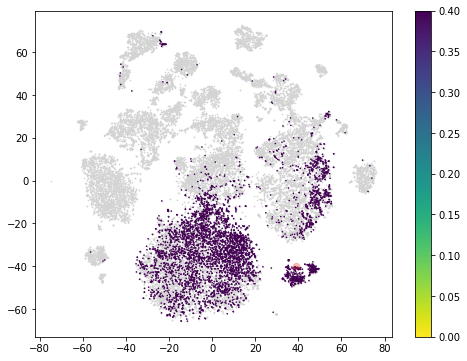

In [586]:
N = 24185
x = []
ix = 149
for _ in range(10):
    x.append(cosine_distances(np.vstack([np.random.poisson(data[:,ix]),np.random.poisson(data[:,ix])]))[0,1])
print(np.mean(x))
#rg = radius_neighbors_graph(data[:, :N].T+1, metric="cosine",radius=r,mode="distance")
ex = cosine_distances(data[:, :N].T, (data[:, :N].T)[ix][None, :])[:,0]

with loompy.connect(in_file) as ds:
    plt.figure(figsize=(8,6))
    ax = plt.axes()
    plt.scatter(dxy[:,0],dxy[:,1],s=10,lw=0,marker='.',c="lightgrey")
    # plt.scatter(dxy[:,0],dxy[:,1],s=10,lw=0,marker='.',c=ds.ca.Clusters,cmap="tab20")
    #ex = ds[ds.ra.Gene == "Top2a", :][0]
    cid = 2
    # ex = ds.ca.Clusters == cid
    # print(ds.ca.Cluster[ex][0])
    # d = ds.ca._Total
    cells = ex < np.mean(x) *2
    cax=plt.scatter(dxy[:,0][cells],dxy[:,1][cells],s=10,vmin=0,vmax=0.4,cmap="viridis_r",lw=0,marker='.',c=ex[cells])
    plt.scatter(dxy[:,0][ix],dxy[:,1][ix],s=40,c="red",alpha=0.25)
    plt.colorbar(cax)



## TODO: stabilize the Poisson neighborhood estimates by KNN smoothing
















In [7]:
with loompy.connect("/Users/stelin/build_20171205/L5_All.loom") as ds:
    print(ds.ca.ClusterName[ds.ca.TaxonomyRank4 == "Enteric neurons"])

['MBDOP1' 'MBDOP1' 'MBDOP1' ..., 'TEINH2' 'TEINH2' 'TEINH2']


## Better Poisson neighborhood

In order to obtain a 95% credible region in all N dimensions, 
use a chi square interval with alpha=10^(log(0.95)/N) on each dimension: https://arxiv.org/pdf/1102.0822.pdf

This gives a bounding hyper-rectangle of volume V. However, most of the volume will be in the corners.

Replace the hyper-rectangle with an ellipsoid of the same volume.

## Manifold distances

Use negative values in the matrix to represent genes not in subspace